In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shruthidulluri
Your Kaggle Key: ··········


100%|██████████| 1.55k/1.55k [00:00<00:00, 839kB/s]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df=df.drop('CustomerID',axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


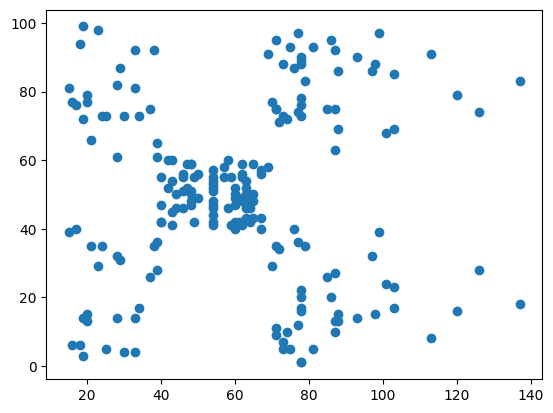

In [12]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans=KMeans(init='k-means++',n_clusters=5,n_init=12)

In [15]:
kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5, n_init=12)

Text(0.5, 1.0, 'clustering graph of  Annual Income vs spending score')

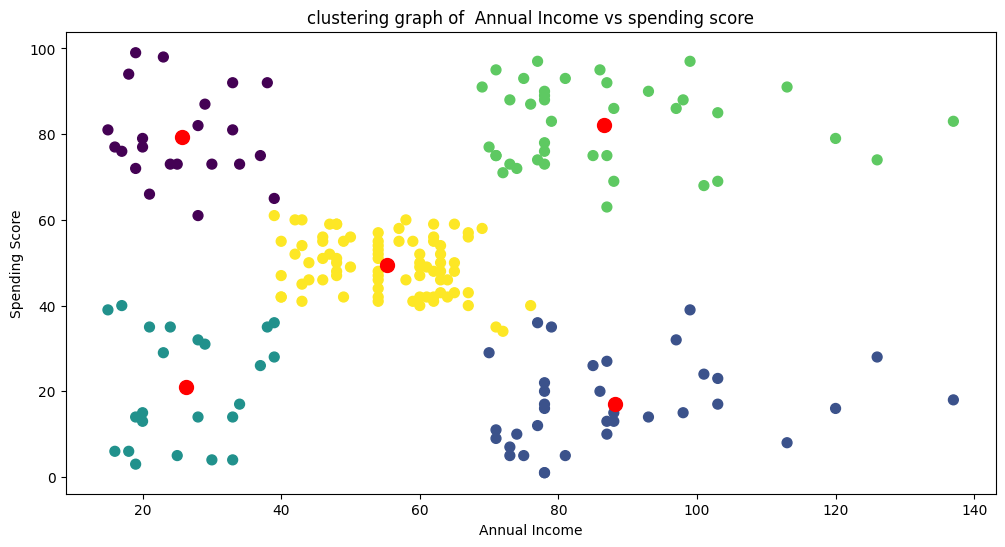

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],s=50,c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = 'r',s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title("clustering graph of  Annual Income vs spending score")

In [18]:
# Finding minimum number of clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(init='k-means++',n_clusters=i,n_init=12)
  kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  wcss.append(kmeans.inertia_)

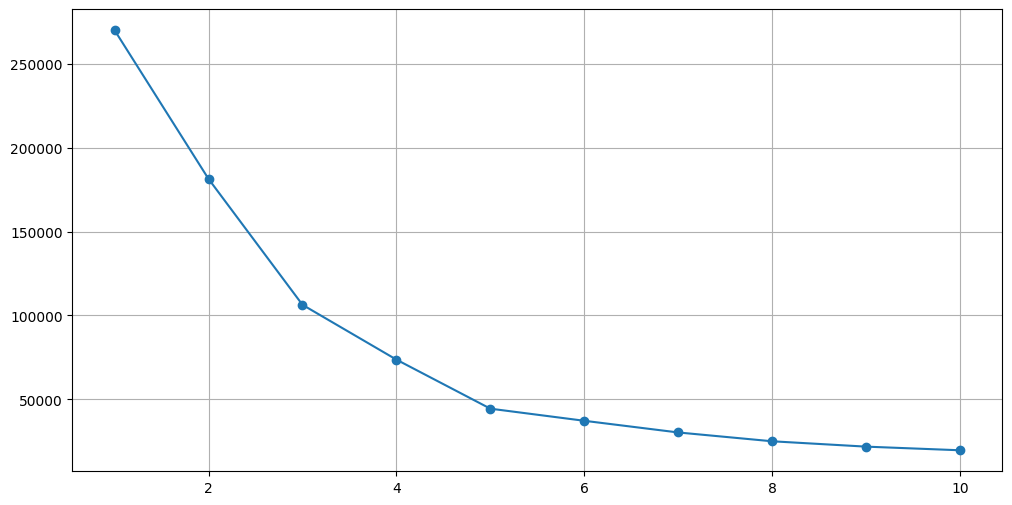

In [21]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss,marker='o')
plt.grid(True)

In [22]:
#here we can see that minimum clusters required are 5

In [24]:
# Clustering using DBScan
from sklearn.cluster import DBSCAN

In [106]:
db=DBSCAN(eps=0.3,min_samples=5)

In [107]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X=st.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])

In [108]:
db.fit(X)

DBSCAN(eps=0.3)

In [109]:
print(set(db.labels_))

{0, 1, 2, 3, 4, 5, 6, -1}


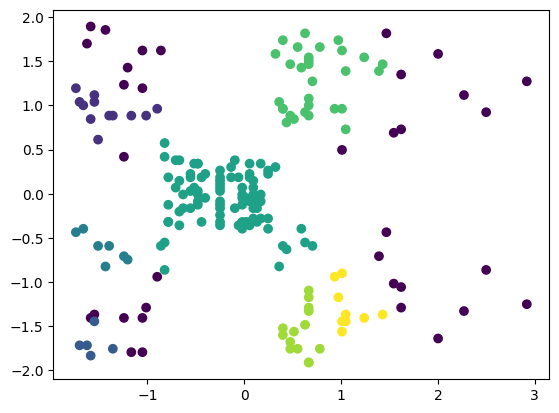

In [110]:
plt.scatter(X[:,0],X[:,1],c=db.labels_)

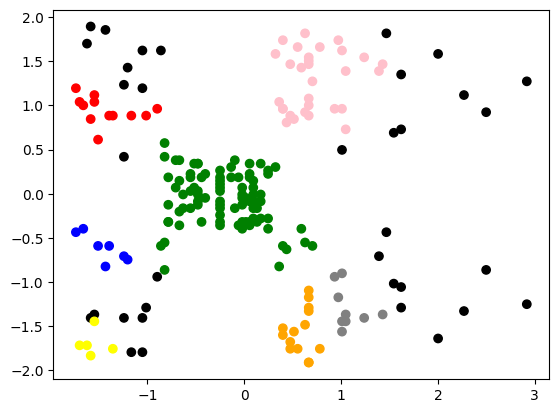

In [111]:
color_map=np.array(['red','yellow','blue','green','pink','orange','grey','black'])
plt.scatter(X[:,0],X[:,1],c=color_map[db.labels_])

In [114]:
lst=[]
for i in db.core_sample_indices_:
  lst.append(X[i])
arr=np.array(lst)

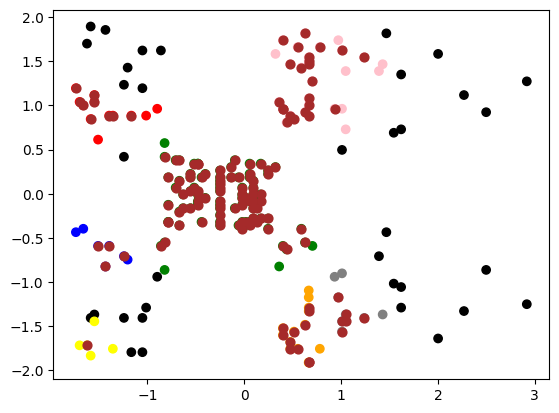

In [115]:
plt.scatter(X[:,0],X[:,1],c=color_map[db.labels_])
plt.scatter(arr[:,0],arr[:,1],c='brown',s=40)